<a href="https://colab.research.google.com/github/GuadalupeLopezAsc/SQL_SAS_Project/blob/main/Proyecto_de_SQL_y_SAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Listado de precios y clientes que contratan servivio de Airbnb 2016



*   El propósito principal de esta práctica fue aprender a manipular bases de datos en diversas plataformas, una pequeña mención de estás son Collab y SAS, aunado a esto, también aprendimos a manipular los datos de dichas bases. A través de la manipulación de estos datos pudimos realizar operaciones, consultas y gráficos, esto para poder tener una mejor comprensión de los datos y poder brindar un análisis más acertado de la información.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt


In [2]:
!git clone https://github.com/GuadalupeLopezAsc/SQL_SASproject.git
#insertamos el link de donde se encutran los archivos que usaremos

fatal: destination path 'SQL_SASproject' already exists and is not an empty directory.


In [3]:
ls -la #Mostramos la ubicacion de los archivos

total 24
drwxr-xr-x 1 root root 4096 Mar  4 20:23 ./
drwxr-xr-x 1 root root 4096 Mar  4 19:48 ../
drwxr-xr-x 4 root root 4096 Feb 29 14:22 .config/
drwxr-xr-x 2 root root 4096 Mar  4 20:23 .ipynb_checkpoints/
drwxr-xr-x 1 root root 4096 Feb 29 14:23 sample_data/
drwxr-xr-x 3 root root 4096 Mar  4 19:49 SQL_SASproject/


In [4]:
pwd

'/content'

In [5]:
reviewe = pd.read_excel('/content/SQL_SASproject/Reviews.xlsx')
reviewe
#Mostramos la tabla de exel del archivo Reviews.

,airbnb_id,listing_id,date,reviewer_id,reviewer_name
0,3342,7369,2009-06-07,20217,Tim
1,3343,7369,2009-06-28,21786,Kristin
2,3344,6606,2009-07-17,18085,Vivian
3,3345,9460,2009-08-31,32825,Serena
4,3346,7369,2009-09-10,19047,Doug
...,...,...,...,...,...
123,3465,20927,2010-08-31,200068,Shawn
124,3466,25002,2010-09-01,181336,Wendy
125,3467,5682,2010-09-01,181217,Sabahat
126,3468,46022,2010-09-01,213915,Katya


In [6]:
Listi = pd.read_excel('/content/SQL_SASproject/Listings.xlsx')
Listi
#Mostramos la tabla de exel del archivo Listings.

,airbnb_id,host_name,host_id,host_location,smart_location,place_id,price,property_type,cancellation_policy,review_scores_location
0,3342,Jessica,4193,Seattle,Seattle,3468,120,House,strict,NaN
1,3343,Jess & Joey,35749,Seattle,Seattle,3465,82,House,moderate,9.0
2,3344,Maddy,8993,Seattle,Seattle,3458,48,Apartment,strict,9.0
3,3345,Joyce,14942,Seattle,Seattle,3485,90,Apartment,strict,10.0
4,3346,Shireen,19425,Seattle,Seattle,3487,85,Condominium,flexible,10.0
...,...,...,...,...,...,...,...,...,...,...
194,3536,Monika,2203746,Seattle,Seattle,3481,52,Cabin,strict,9.0
195,3537,Monika,2203746,Seattle,Seattle,3470,81,Apartment,strict,9.0
196,3538,Beb,64955,Seattle,Seattle,3471,125,Apartment,strict,10.0
197,3539,Monika,2203746,Seattle,Seattle,3457,49,House,strict,9.0


In [7]:
Calen = pd.read_excel('/content/SQL_SASproject/Calendar.xlsx')
Calen
#Mostramos la tabla de excel de Calendar.

,listing_id,date,available
0,3335,2016-01-04,f
1,3335,2016-01-05,f
2,3335,2016-01-06,f
3,3335,2016-01-07,f
4,3335,2016-01-08,f
...,...,...,...
77,3335,2016-03-21,t
78,3335,2016-03-22,t
79,3335,2016-03-23,t
80,3335,2016-03-24,t


In [8]:
import sqlite3

conn= sqlite3.connect('TestDB_G.db') # Creamos una nueva base de datos con el nombre "TestDB_H"
c = conn.cursor()

# Creamos la tabla de Review.
c.execute('''CREATE TABLE REVIEW1
             ([generated_id] INTEGER PRIMARY KEY, [airbnb_id] integer ,[listing_id] integer, [Date] date, [Reviewer_id] integer, [reviewer_name] text )''')
# Creamos la tabla de Listing.
c.execute('''CREATE TABLE LISTING1
             ([generated_id] INTEGER PRIMARY KEY, [airbnb_id] integer ,[host_name] text, [host_id] integer,[host_location] text,[smart_location] text ,[place_id] integer , [price] integer,[property_type] text ,[cancellation_policy] text, [review_scores_location] integer )''')
# Creamos la tabla de Price.
c.execute('''CREATE TABLE PRICE1
             ([review_scores_location] integer, [reviewer_name] text ,[price] integer)''')

conn.commit()

In [9]:
import sqlite3
import pandas as pd
from pandas import DataFrame

conn = sqlite3.connect('TestDB_G.db')
c = conn.cursor()

read_reviews = pd.read_excel('/content/SQL_SASproject/Reviews.xlsx')
read_reviews.to_sql('REVIEW', conn, if_exists='append', index = False) # Agregamos los valores o datos del archivo de excel de Review.

read_listings = pd.read_excel('/content/SQL_SASproject/Listings.xlsx')
read_listings.to_sql('LISTING', conn, if_exists='replace', index = False) # Reemplamos los valores de la tabla de excel de Listing.



199

In [10]:
ls-la # Mostramos ahora la ubicacion de nuestro archivo creado anteriormente.

total 72
drwxr-xr-x 1 root root  4096 Mar  4 20:23 ./
drwxr-xr-x 1 root root  4096 Mar  4 19:48 ../
drwxr-xr-x 4 root root  4096 Feb 29 14:22 .config/
drwxr-xr-x 2 root root  4096 Mar  4 20:23 .ipynb_checkpoints/
drwxr-xr-x 1 root root  4096 Feb 29 14:23 sample_data/
drwxr-xr-x 3 root root  4096 Mar  4 19:49 SQL_SASproject/
-rw-r--r-- 1 root root 45056 Mar  4 20:23 TestDB_G.db


In [11]:
#Unimos las dos tablas y mostramos como quedarian acomodadas.
c.execute('''
INSERT INTO PRICE1 (review_scores_location,reviewer_name, price)
SELECT DISTINCT ctr.review_scores_location, clt.reviewer_name, ctr.price
FROM REVIEW clt
LEFT JOIN LISTING ctr ON ctr.airbnb_id = clt.airbnb_id
          ''')

c.execute('''
SELECT DISTINCT *
FROM PRICE1
WHERE review_scores_location = (SELECT max(review_scores_location) FROM PRICE1)
          ''')

print(c.fetchall())
fetch=c.fetchall()


[(10, 'Serena', 90), (10, 'Doug', 85), (10, 'Alex', 99), (10, 'Russell', 165), (10, 'TomJudy', 125), (10, 'Jill', 120), (10, 'Evonne', 310), (10, 'Jennifer', 360), (10, 'Andrew', 40), (10, 'Joelle', 95), (10, 'Kathy', 145), (10, 'Rameez', 89), (10, 'James', 79), (10, 'Jingchuan & Achille', 119), (10, 'David', 165), (10, 'Shelly', 75), (10, 'Don', 199), (10, 'Happy', 275), (10, 'Audrey', 59), (10, 'Asad', 75), (10, 'Alexander', 125), (10, 'Rita', 165), (10, 'Maria', 97), (10, 'April', 60), (10, 'Chad', 250), (10, 'Betsy', 75), (10, 'Wei', 89), (10, 'Veronica', 89), (10, 'Gregg', 65), (10, 'E. Chloe', 100), (10, 'Hilda', 110), (10, 'Ken', 79), (10, 'Jason', 120), (10, 'Stephanie', 140), (10, 'Jennie', 235), (10, 'Joy-Alonica', 280), (10, 'Michele', 100), (10, 'Gemma', 395), (10, 'Brenda', 122), (10, 'Ellery', 250), (10, 'Sherry', 140), (10, 'Denise', 100), (10, 'Sue', 115), (10, 'Peter', 79), (10, 'Kimi', 110), (10, 'Mary', 145), (10, 'Natasha', 150), (10, 'Keri', 95), (10, 'Jerome', 110

In [12]:
#Construimos la segunda tabla y mostramos como quedarian.
c.execute('''
INSERT INTO PRICE1 (review_scores_location,reviewer_name, price)
SELECT DISTINCT ctr.review_scores_location, clt.reviewer_name, ctr.price
FROM REVIEW clt
LEFT JOIN LISTING ctr ON ctr.airbnb_id = clt.airbnb_id
          ''')

c.execute('''
SELECT DISTINCT *
FROM PRICE1
WHERE review_scores_location = (SELECT max(review_scores_location) FROM PRICE1)
          ''')

#Creamos un Data Frame para poder visualizar los datos por columnas

df = DataFrame(c.fetchall(), columns=['review_scores_location','reviewer_name','price'])
print (df)

    review_scores_location reviewer_name  price
0                       10        Serena     90
1                       10          Doug     85
2                       10          Alex     99
3                       10       Russell    165
4                       10       TomJudy    125
..                     ...           ...    ...
64                      10          Sara     90
65                      10        Jeremy    149
66                      10         Shawn     60
67                      10         Wendy     80
68                      10       Sabahat     45

[69 rows x 3 columns]


In [13]:
df.info() # Mostramos la informacion de dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_scores_location  69 non-null     int64 
 1   reviewer_name           69 non-null     object
 2   price                   69 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.7+ KB


In [14]:
df #Mostramos el dataframe

,review_scores_location,reviewer_name,price
0,10,Serena,90
1,10,Doug,85
2,10,Alex,99
3,10,Russell,165
4,10,TomJudy,125
...,...,...,...
64,10,Sara,90
65,10,Jeremy,149
66,10,Shawn,60
67,10,Wendy,80


In [15]:
#Consultamos las tablas con la condicion que nos muestre a las personas que su nombre inicie con la letra "S"
c.execute('''
SELECT DISTINCT*
FROM PRICE1
WHERE  reviewer_name like "S%"

          ''')

df = DataFrame(c.fetchall(), columns=['review_scores_location','reviewer_name','price'])
print (df)

    review_scores_location reviewer_name  price
0                     10.0        Serena     90
1                      9.0         Sarah    186
2                     10.0        Shelly     75
3                      NaN      Samantha     99
4                     10.0     Stephanie    140
5                     10.0        Sherry    140
6                     10.0           Sue    115
7                      9.0      Sandrine     99
8                     10.0          Sara     90
9                      9.0       Sabahat    275
10                    10.0         Shawn     60
11                    10.0       Sabahat     45


In [16]:
# Le indicamos que ahora nos muestre los precios mayores a 300 con el nombre la persona y su calificación que dieron.
c.execute('''
SELECT DISTINCT*
FROM PRICE1
WHERE  price > 300

          ''')

df = DataFrame(c.fetchall(), columns=['review_scores_location','reviewer_name','price'])
print (df)


   review_scores_location reviewer_name  price
0                      10        Evonne    310
1                      10      Jennifer    360
2                      10         Gemma    395


In [17]:
# Ahora ponemos la indicacion que nos muestre a los precios menores de 50 con las personas que lo compraron y su respectiva calificacion.
c.execute('''
SELECT DISTINCT *
FROM PRICE1
WHERE  price < 50

          ''')

df = DataFrame(c.fetchall(), columns=['review_scores_location','reviewer_name','price'])
print (df)

   review_scores_location reviewer_name  price
0                       9        Vivian     48
1                      10        Andrew     40
2                       9           Roy     46
3                      10       Sabahat     45


In [18]:
# Ahora ponemos la indicación que nos muestre los precios iguales a 40 (menor precio) con las personas que lo compraron y la calificación que dieron.
c.execute('''
SELECT DISTINCT *
FROM PRICE1
WHERE  price = 40


          ''')

df = DataFrame(c.fetchall(), columns=['review_scores_location','reviewer_name','price'])
print (df)

   review_scores_location reviewer_name  price
0                      10        Andrew     40


In [19]:
# Mostramos ahora a las personas que dieron una calificacion menor que 7 con el nombre y precio.
c.execute('''
SELECT DISTINCT*
FROM PRICE1
WHERE  review_scores_location < 9

          ''')

df = DataFrame(c.fetchall(), columns=['review_scores_location','reviewer_name','price'])
print (df)


   review_scores_location reviewer_name  price
0                       7          Erin    215
1                       7         Jenny    110


In [22]:
#Tabla donde tenemos todos las viviendas y su calificaicón.
c.execute('''
SELECT DISTINCT *
FROM PRICE1
''')

df_total_2 = DataFrame(c.fetchall(), columns=['review_scores_location', 'reviewer_name', 'price'])
print(df_total_2)

     review_scores_location reviewer_name  price
0                       NaN           Tim    120
1                       9.0       Kristin     82
2                       9.0        Vivian     48
3                      10.0        Serena     90
4                      10.0          Doug     85
..                      ...           ...    ...
123                    10.0         Shawn     60
124                    10.0         Wendy     80
125                    10.0       Sabahat     45
126                     9.0         Katya    115
127                     9.0        Amanda     85

[128 rows x 3 columns]


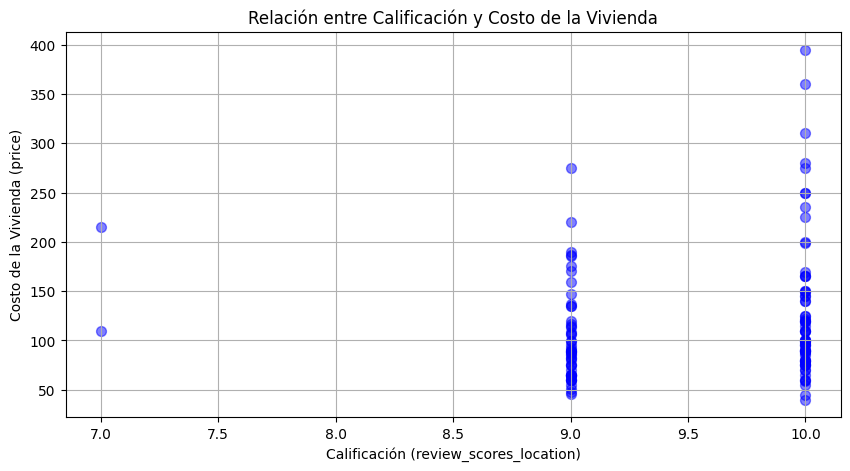

In [23]:
#Gráfico de la relación calificación y costo de la vivienda
plt.figure(figsize=(10, 5))  # Tamaño de la figura
plt.scatter(df_total_2['review_scores_location'], df_total_2['price'], alpha=0.5, color='b', s=50)
plt.xlabel('Calificación (review_scores_location)')
plt.ylabel('Costo de la Vivienda (price)')
plt.title('Relación entre Calificación y Costo de la Vivienda')
plt.grid(True)
plt.show()

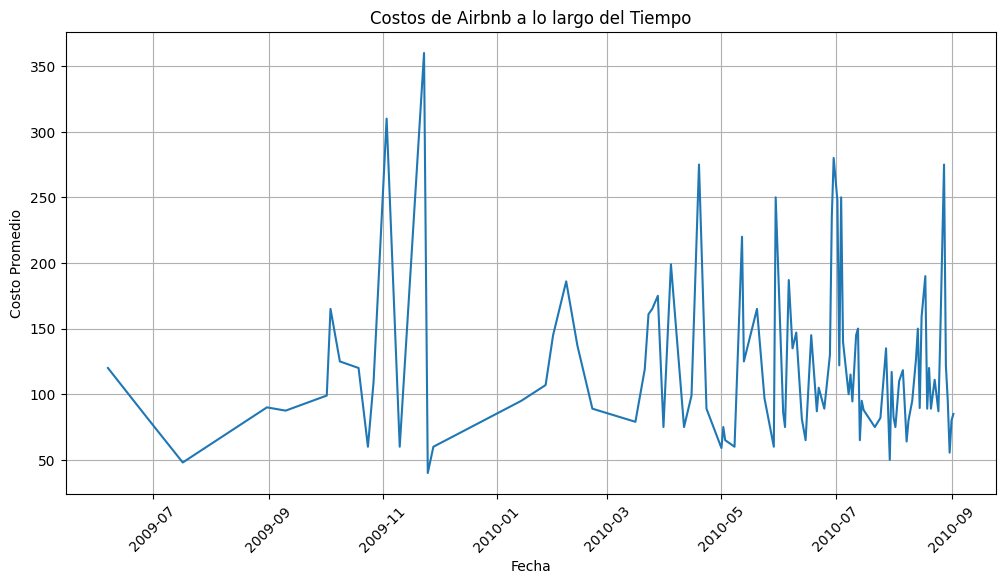

In [24]:
merged_df = pd.merge(Listi, reviewe, on='airbnb_id')
average_prices_by_date = merged_df.groupby('date')['price'].mean()

plt.figure(figsize=(12, 6))
plt.plot(average_prices_by_date.index, average_prices_by_date.values)
plt.xlabel('Fecha')
plt.ylabel('Costo Promedio')
plt.title('Costos de Airbnb a lo largo del Tiempo')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

(Parte 2)

# SAS

*   Para descargar las tablas: https://github.com/GuadalupeLopezAsc/SQL_SASproject

*   Para ver el código elaborado con SAS: https://raw.githubusercontent.com/GuadalupeLopezAsc/SASproject/main/SASproject.txt

* Para ver los datos sin modificar
https://www.kaggle.com/datasets/alexanderfreberg/airbnb-listings-2016-dataset



# CONCLUSIONES.

*   Como conclusión paritcular de la información recopilada, podemos notar que en gran parte de los Airbnb los usuarios están muy conformes dando calificaciones altas, por otra parte se puede observar que hay más demanda en los meses vacacionales como diciembre y por ende los cosotos suelen ser mayores, una vez pasadas las vacaciones los precios se desploman y se mantienen dentro de un rango de 50 a 250 con pequeños picos que corresponden a los puentes vacacionales que hay durante el año.






